In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import glob
import scipy.signal as scs
import sys
sys.path.append('d:\\gitCCA\\CESdesign\\py\\')
import CESfunctions as cf

In [ ]:
##### Spectra handling

In [2]:
## Load files into matrices
logfolder1 = 'D:\\CCA\\Avantes\\logs10dic\\'
#logfolder1 = '/home/mixtli/Avantes/logs30nov/'

SCbg1a = cf.spectra_accumulator(logfolder1 + 'CEASbckg1aSC.npy',50)
SCbg1 = cf.spectra_accumulator(logfolder1 + 'CEASbckg1SC.npy',50)
SCbg2 = cf.spectra_accumulator(logfolder1 + 'CEASbckg2SC.npy',50)
SCln1 = cf.spectra_accumulator(logfolder1 + 'CEASline1SC.npy',50)

In [3]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = SCln1
background = SCbg2

reference1=np.load("NO2ref_AvSC_corr.npy")

In [4]:
#### Getting or setting values for Reff
Reff = 0.9994

In [5]:
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
I_sample=np.average(line[:,1:],axis=1)
I_0=np.average(bckg[:,1:],axis=1)

In [10]:
### Recursive fit: Ext -> SVD -> f(l) -> Ext-f(l) -> SVD
ndensity = cf.recursive_fit(I_sample,I_0,Reff,distance,ref1)

Primer N:  930427847845.4691  Segundo N:  762532397812.8818
762532397812.8818


In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

#ax1.plot(SCln1[:,0]*.95+22.95, alpha2,'-g',label="Ext")
ax1.plot(line[:,0]*.95+22.95, Reff,'-r',label="")

ax1.set_xlim(445,459)
ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(.99994,1.00001)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

#ax1.plot(SCln1[:,0]*.95+22.95, alpha2,'-g',label="Ext")
ax1.plot(line[:,0]*.95+22.95, I_ratio,'-r',label="")

ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(1.80,2)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

NameError: name 'f_l_sg' is not defined

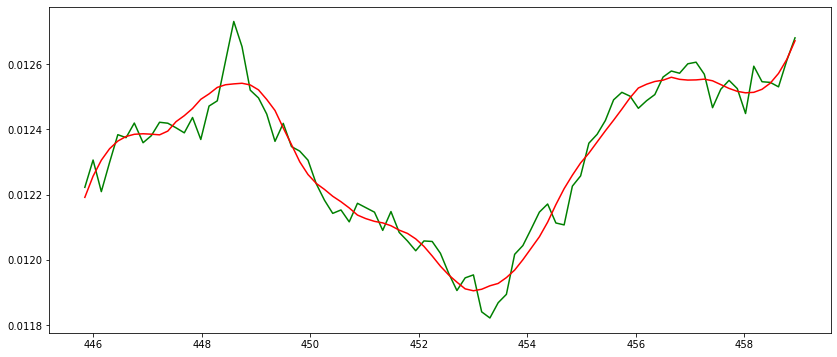

In [8]:
I_ratio=I_0/I_sample
f_c=(I_ratio-1)/70-(ref1[:,1]*(ndensity/(1-0.9994)))
f_c_sg=scs.savgol_filter(f_c, 19, 3)

f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(line[:,0]*.95+22.95, f_c,'-g',label="")
ax1.plot(line[:,0]*.95+22.95, f_c_sg,'-r',label="")
ax1.plot(line[:,0]*.95+22.95, f_l_sg/(1-0.9994),'-b',label="")
#-NO2ref[:,1]*1.5e15
ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(0.0115,0.0135)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(bckg[:,0], bckg[:,1],'-b',label="")
ax1.plot(line[:,0], line[:,1],'-r',label="")

ax1.set_xlim(442,463)
#ax1.set_xticks(np.arange(446,459,1))
#ax1.set_ylim(0,2e5)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(no2refa[:,0],no2refa[:,1],'-b',label="")
ax1.plot(no2[:,0], no2[:,1],'-r',label="")

ax1.set_xlim(442,463)
#ax1.set_xticks(np.arange(446,459,1))
#ax1.set_ylim(0,2e5)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(line[:,0]*.95+22.95, alpha2,'-g',label="Ext")
ax1.plot(NO2ref[:,0], NO2ref[:,1]*7.5e11-.000000014*NO2ref[:,0]+6.275e-6,'-r',label="$\sigma$ N+c")

ax1.set_xlim(445,459)
ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(0e-7,1.0e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
I_ratio=I_0/I_sample
f_c=(I_ratio-1)/70-(ref1[:,1]*(c/(1-0.9994)))
f_c_sg=scs.savgol_filter(f_c, 19, 3)

f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(line[:,0]*.95+22.95, f_c,'-g',label="")
ax1.plot(line[:,0]*.95+22.95, f_c_sg,'-r',label="")
#-NO2ref[:,1]*1.5e15
ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(0.0115,0.0135)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(ref_NO2_static[:,0], ext_NO2,'-g',label="Ext")
ax1.plot(ref_NO2_static[:,0], x_hat_NO2[2,0]*ref_NO2[:,1]+x_hat_NO2[1,0]*ref_NO2[:,0]*x_hat_NO2[0,0]+7.8e-6,'-r',label="SVD iter #1")

ax1.set_xlim(445,459)
ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
#### BIG DATA TEST